In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from read_db.CH import Getch
import pandas as pd

In [2]:
query = """
select user_id
    , countIf(user_id, action = 'view') as views
    , countIf(user_id, action = 'like') as likes
    , likes/views as ctr
    , exp_group
from simulator_20220520.feed_actions
where toDate(time) between '2022-04-17' and '2022-04-23'
and exp_group in (2,3)
group by user_id, exp_group
"""

df = Getch(query).df

In [3]:
df.groupby('exp_group')['user_id'].count()

exp_group
2    8480
3    8569
Name: user_id, dtype: int64

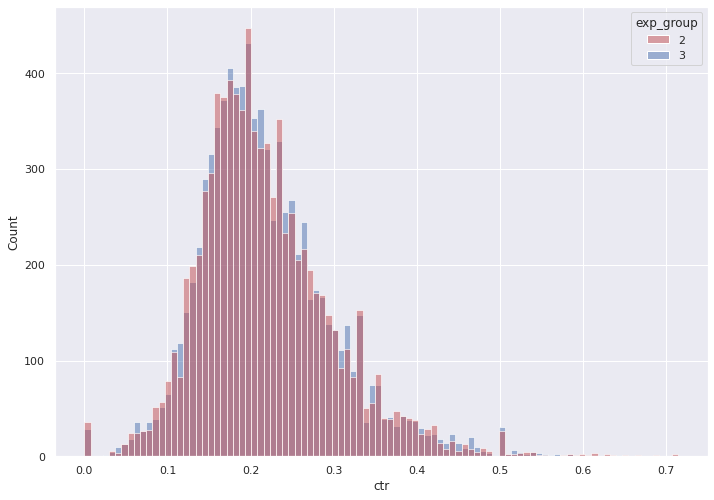

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [5]:
def aa_ttest(samples = 10000, n_count = 500, data = df, a_group = 2, b_group = 3, metric = 'ctr', alpha = 0.05):
   
    p_values_t = []
    data_a = data[data['exp_group'] == a_group]
    data_b = data[data['exp_group'] == b_group]
    
    for _ in range(samples):
        m_group_a = data_a.sample(n_count)[metric]    
        m_group_b = data_b.sample(n_count)[metric]
        p_values_t.append(stats.ttest_ind(m_group_a, m_group_b, equal_var=False)[1])
        
    sns.set(rc={'figure.figsize': (12, 4)}, style="whitegrid")
    ax = sns.histplot(p_values_t, bins = 100)   
    
    low_p = len([n for n in p_values_t if n<0.05])/samples
    print(f"Из {samples} итераций в {low_p*100:.2f}% случаев p value оказался меньше {alpha}")
    
    


Из 10000 итераций в 4.35% случаев p value оказался меньше 0.05


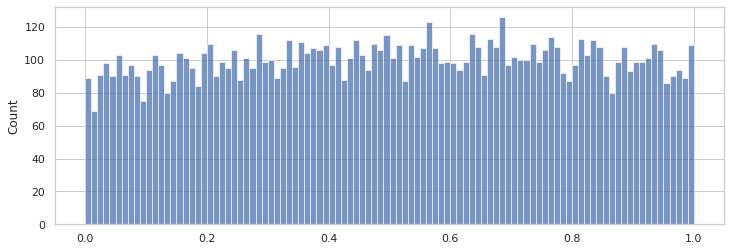

In [6]:
aa_ttest()

Лишь в 4.76% мы получили статистически значимые различия в группах по CTR. Принимаем что группы схожи и АА тест пройден. 